In [1]:
from laspy.file import File
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load the data using laspy
#inFile = File('../../Data/10552_NYU_M2 - Scanner 1 - 190511_164239_1 - originalpoints.laz', mode='r')
inFile = File('../../Data/172201/10552_NYU_M2 - Scanner 1 - 190511_172201_1 - originalpoints.las', mode='r')
I = inFile.Classification == 2

# raw is a 1-D numpy array, each entry is a point
raw = inFile.get_points()
print(len(raw))

18942131


In [35]:
columns_fwf =[   
    'X',
    'Y',
    'Z',
    'intensity',
    'flag_byte',
    'classification_flags',
    'classification_byte',
    'user_data',
    'scan_angle',
    'pt_src_id',
    'gps_time',
    'wave_packet_desc_index',
    'byte_offset_to_waveform_data',
    'wavefm_pkt_size',
    'return_point_waveform_loc',
    'x_t',
    'y_t',
    'z_t' ]

columns_point_cloud = [
    'X',
    'Y',
    'Z',
    'intensity',
    'flag_byte',
    'classification_flags',
    'classification_byte',
    'user_data',
    'scan_angle',
    'pt_src_id',
    'gps_time']

# Q: Do gps_time's line up between point cloud and fwf?

18

In [ ]:
def raw_to_df(raw,column_names):
    # function takes raw output of laspy.File.get_points() and column names, and returns a pandas Dataframe
    raw_list = [a[0].tolist() for a in raw]
    df = pd.DataFrame(raw_list,columns = column_names)
    return df

def split_and_strip(raw):
    '''Function takes the output ndarray of laspy File.get_points(), 
        splits each point on commas, 
        outputs a list of lists.'''
    output_list = []
    for row in raw:
        stripped = [a.strip("( , )") for a in str(row).split(',')]
        output_list.append(stripped)
    return output_list

def row_clean(string_list):
    '''Function takes as input a list of lists, the output of split_and_strip().  Cleans the entries for spaces,
    returns a numpy array where each row is a point.'''
    output_list = []
    for row in string_list:        
        output_list.append(list(map(float,row[:-1])))
    output_arr = np.array(output_list)
    return output_arr

In [77]:
df.head()

,X,Y,Z,intensity,flag_byte,classification_flags,classification_byte,user_data,scan_angle,pt_src_id,gps_time,wave_packet_desc_index,byte_offset_to_waveform_data,wavefm_pkt_size,return_point_waveform_loc,x_t,y_t,z_t
0,975340294,173113464,16421,1159,17,128,0,0,5066,30,62541.080832,1,60,120,17090.0,0.000078,-0.000106,0.000072
1,975340029,173114239,16354,1169,17,0,0,0,5060,30,62541.080835,1,180,120,16451.0,0.000078,-0.000106,0.000072
2,975339779,173114982,16385,1263,17,0,0,0,5056,30,62541.080838,1,300,120,15649.0,0.000078,-0.000106,0.000072
3,975339514,173115761,16338,1290,17,0,0,0,5050,30,62541.080840,1,420,120,18946.0,0.000078,-0.000106,0.000072
4,975339267,173116486,16325,1243,17,0,0,0,5045,30,62541.080843,1,540,120,18187.0,0.000078,-0.000106,0.000072


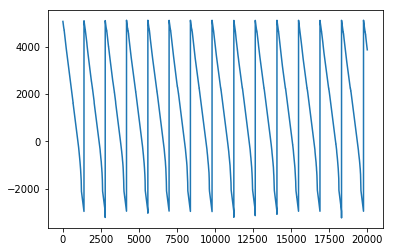

In [83]:
plt.plot(df['scan_angle'][:20000])